### Debug run crashes due to high speeds

In [22]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

Error points:

1988-11
```
  ===>>> : E R R O R
             
          ===========
                     
   stp_ctl: |ssh| > 20 m  or  |U| > 10 m/s  or  S <= 0  or  S >= 100  or  NaN encounter in the tests
                     
 kt 259655 |ssh| max   17.81     at i j   1328 310     MPI rank 376
 kt 259655 |U|   max   362.2     at i j k 1327 310   8 MPI rank 376
 kt 259655 Sal   min  0.1000     at i j k 1327 310   1 MPI rank 376
 kt 259655 Sal   max   35.66     at i j k  357 281  18 MPI rank 239
```

Same location as issue when using JRA (in 1979):

```
   stp_ctl: |ssh| > 20 m  or  |U| > 10 m/s  or  S <= 0  or  S >= 100  or  NaN encounter in the tests

 kt 22512 |ssh| max   4.214     at i j    373 451     MPI rank 743
 kt 22512 |U|   max   17.34     at i j k 1327 310   9 MPI rank 376
 kt 22512 Sal   min   25.67     at i j k  670 231  40 MPI rank 184
 kt 22512 Sal   max   48.56     at i j k 1328 310   8 MPI rank 376

```

In [23]:
folder = '/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/JRA55_1979_2000/'
year  = 1979
dsT   = xr.open_dataset(f'{folder}eANT025.L121_1m_{year}0101_{year}1231_grid_T.nc')
dsU   = xr.open_dataset(f'{folder}eANT025.L121_1m_{year}0101_{year}1231_grid_U.nc')
dsV   = xr.open_dataset(f'{folder}eANT025.L121_1m_{year}0101_{year}1231_grid_V.nc')
dsSBC = xr.open_dataset(f'{folder}eANT025.L121_1m_{year}0101_{year}1231_SBC.nc')

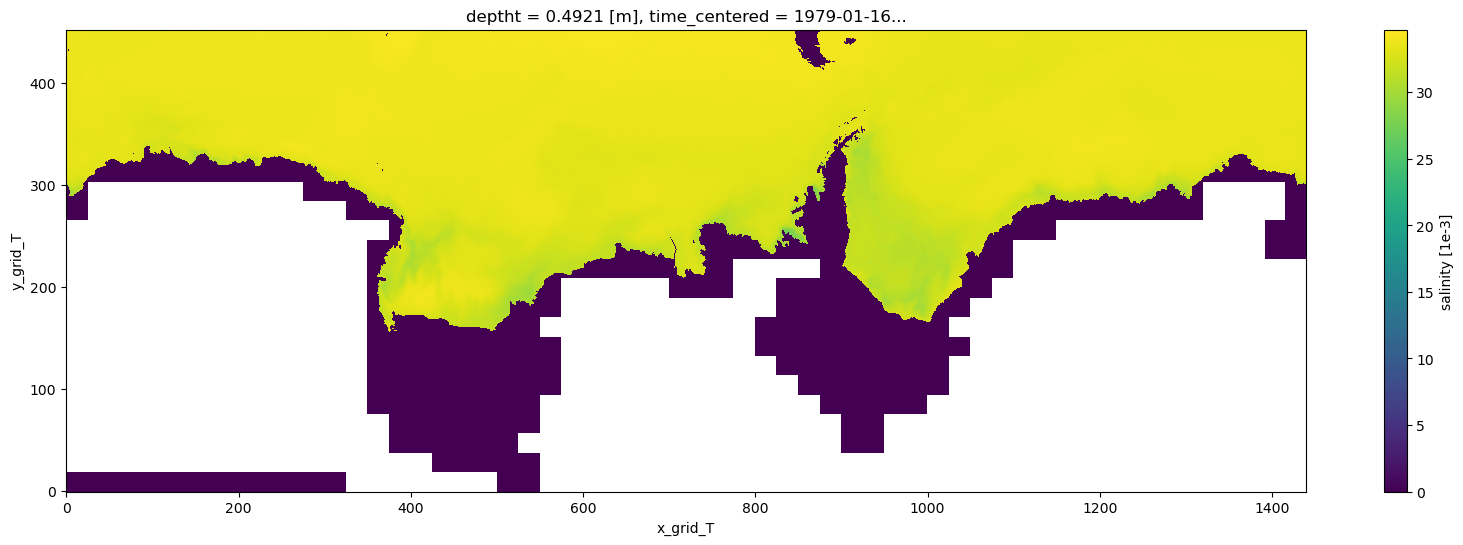

In [28]:
dsT.so.isel(time_counter=0, deptht=0).plot(figsize=(20,6))

In [54]:
dsSBC

<xarray.Dataset>
Dimensions:                (y_grid_T: 453, x_grid_T: 1440, nvertex_grid_T: 4,
                            y_grid_V: 453, x_grid_V: 1440, nvertex_grid_V: 4,
                            time_counter: 10, axis_nbounds: 2)
Coordinates:
    nav_lat_grid_T         (y_grid_T, x_grid_T) float32 ...
    nav_lon_grid_T         (y_grid_T, x_grid_T) float32 ...
    nav_lat_grid_V         (y_grid_V, x_grid_V) float32 ...
    nav_lon_grid_V         (y_grid_V, x_grid_V) float32 ...
    time_centered          (time_counter) datetime64[ns] ...
  * time_counter           (time_counter) datetime64[ns] 1979-01-16T12:00:00 ...
Dimensions without coordinates: y_grid_T, x_grid_T, nvertex_grid_T, y_grid_V,
                                x_grid_V, nvertex_grid_V, axis_nbounds
Data variables: (12/48)
    bounds_nav_lon_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    bounds_nav_lat_grid_T  (y_grid_T, x_grid_T, nvertex_grid_T) float32 ...
    area_grid_T            (y_grid_T, x_grid_T) float32 ...
    bounds_nav_lon_grid_V  (y_grid_V, x_grid_V, nvertex_grid_V) float32 ...
    bounds_nav_lat_grid_V  (y_grid_V, x_grid_V, nvertex_grid_V) float32 ...
    area_grid_V            (y_grid_V, x_grid_V) float32 ...
    ...                     ...
    berg_buoy_melt         (time_counter, y_grid_T, x_grid_T) float32 ...
    berg_eros_melt         (time_counter, y_grid_T, x_grid_T) float32 ...
    berg_conv_melt         (time_counter, y_grid_T, x_grid_T) float32 ...
    berg_hcflx             (time_counter, y_grid_T, x_grid_T) float32 ...
    berg_qlat              (time_counter, y_grid_T, x_grid_T) float32 ...
    berg_varea             (time_counter, y_grid_T, x_grid_T) float32 ...
Attributes:
    name:         eANT025.L121_1m_19790101_19791231_SBC
    description:  surface fluxes variables
    title:        surface fluxes variables
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-28 20:28:01 GMT
    uuid:         b4feb788-8e98-4363-9be0-96f72a939894

SBC output at problem point:
- fwfisf (Ice shelf fresh water flux) --- small and negative, so freshwater goes from ocean to iceshelf
- qoceisf (Ice shelf ocean  heat flux) --- negative, so heat goes from ocean to ice shelf
- qhcisf (Ice shelf heat content flux of injected water) --- positive heat content flux of injected water

--> water at problem point seems to be supercooled....

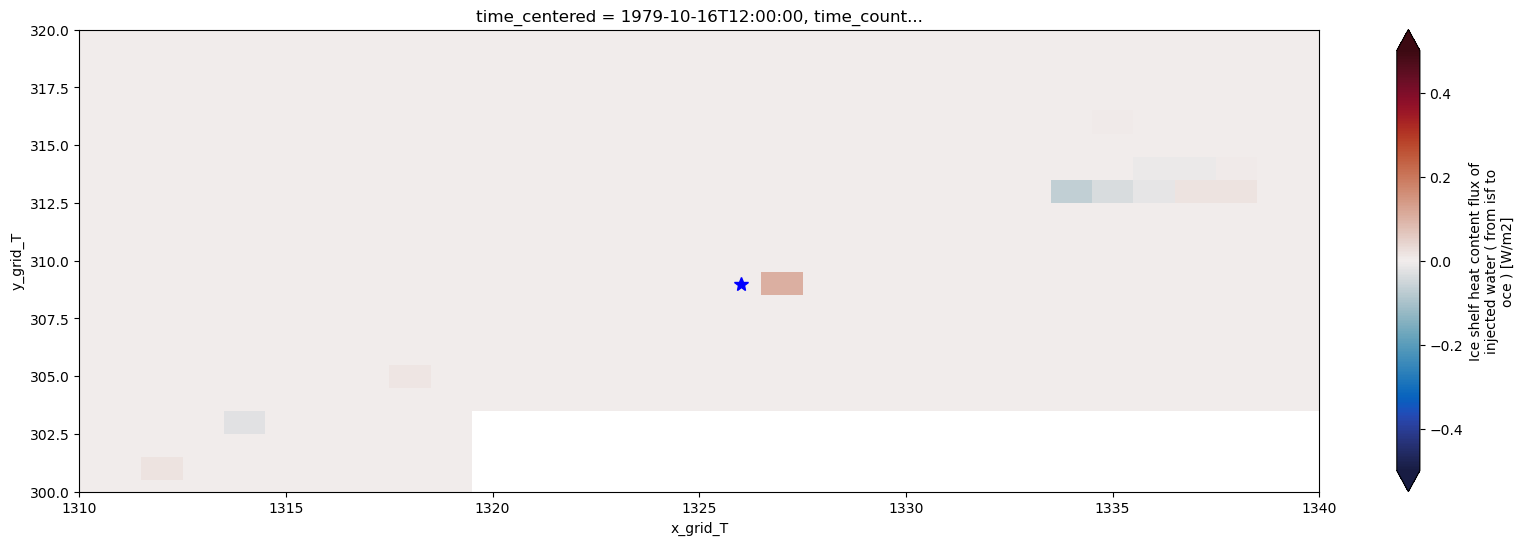

In [72]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsSBC.qhcisf.isel(time_counter=9).plot(vmin=-0.5, vmax=0.5, cmap=cmocean.cm.balance, ax=ax, xlim=(1310, 1340), ylim=(300, 320))
ax.plot([1326],[309], '*b', markersize=10);

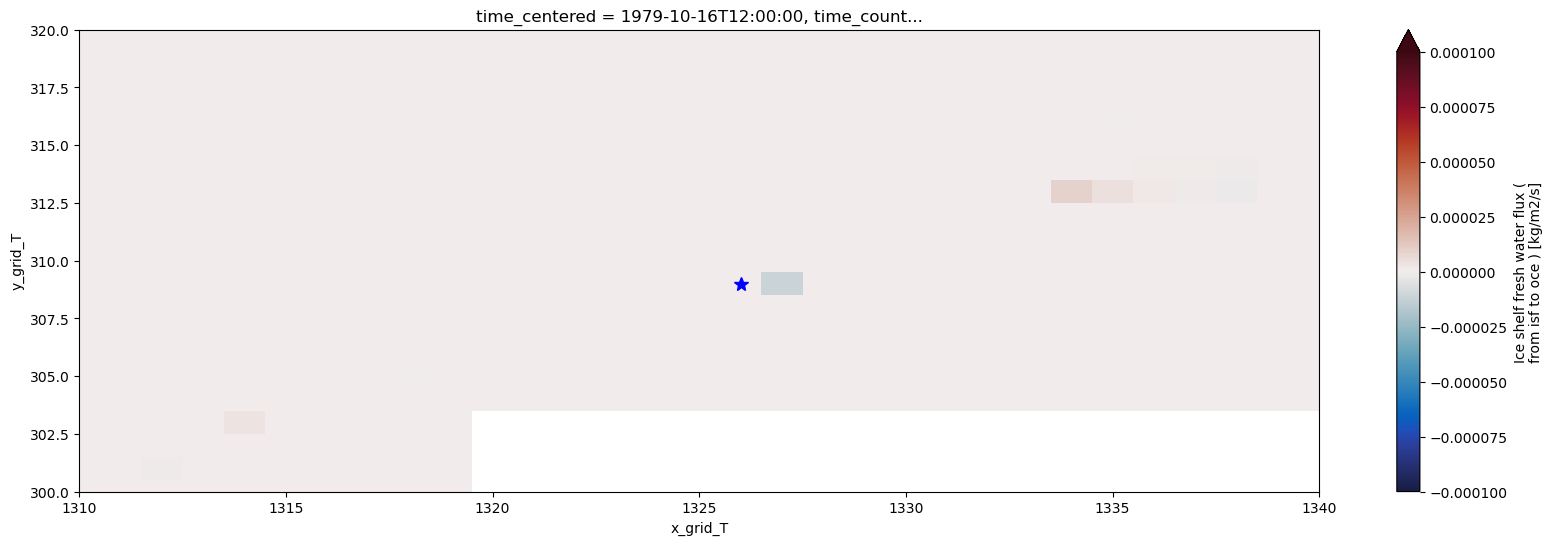

In [65]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsSBC.fwfisf.isel(time_counter=9).plot(vmin=-1e-4, vmax=1e-4, cmap=cmocean.cm.balance, ax=ax, xlim=(1310, 1340), ylim=(300, 320))
ax.plot([1326],[309], '*b', markersize=10);

(20.0, 36.0)

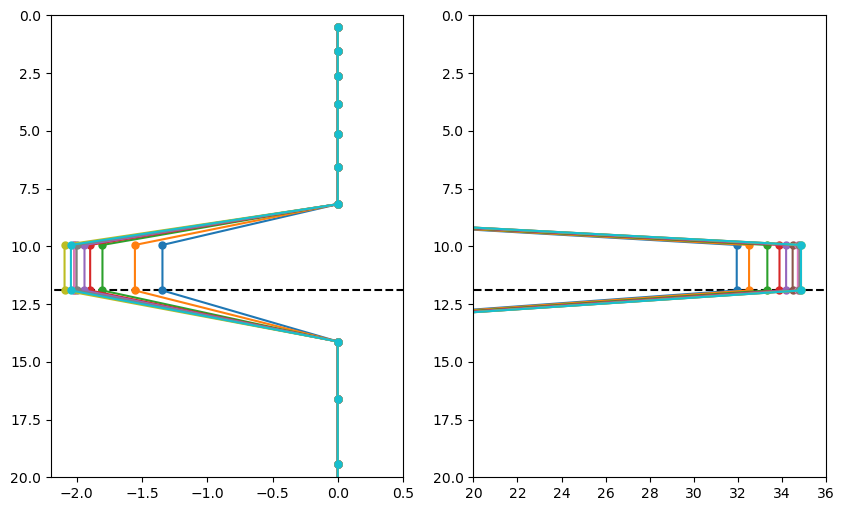

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,6))

for axis in ax.ravel():
    axis.invert_yaxis()
    axis.set_ylim([20,0])
    axis.hlines(y=dsT.deptht.isel(deptht=8), xmin=-100, xmax=100, color='k', linestyle='--')

for time in range(0,10):
    T_plot = dsT.thetao.isel(time_counter=time, y_grid_T=309, x_grid_T=1327)
    ax[0].plot(T_plot, dsT.deptht, '.-', markersize=10)
    S_plot = dsT.so.isel(time_counter=time, y_grid_T=309, x_grid_T=1327)
    ax[1].plot(S_plot, dsT.deptht, '.-', markersize=10)

ax[0].set_xlim([-2.2,0.5])
ax[1].set_xlim([20,36])

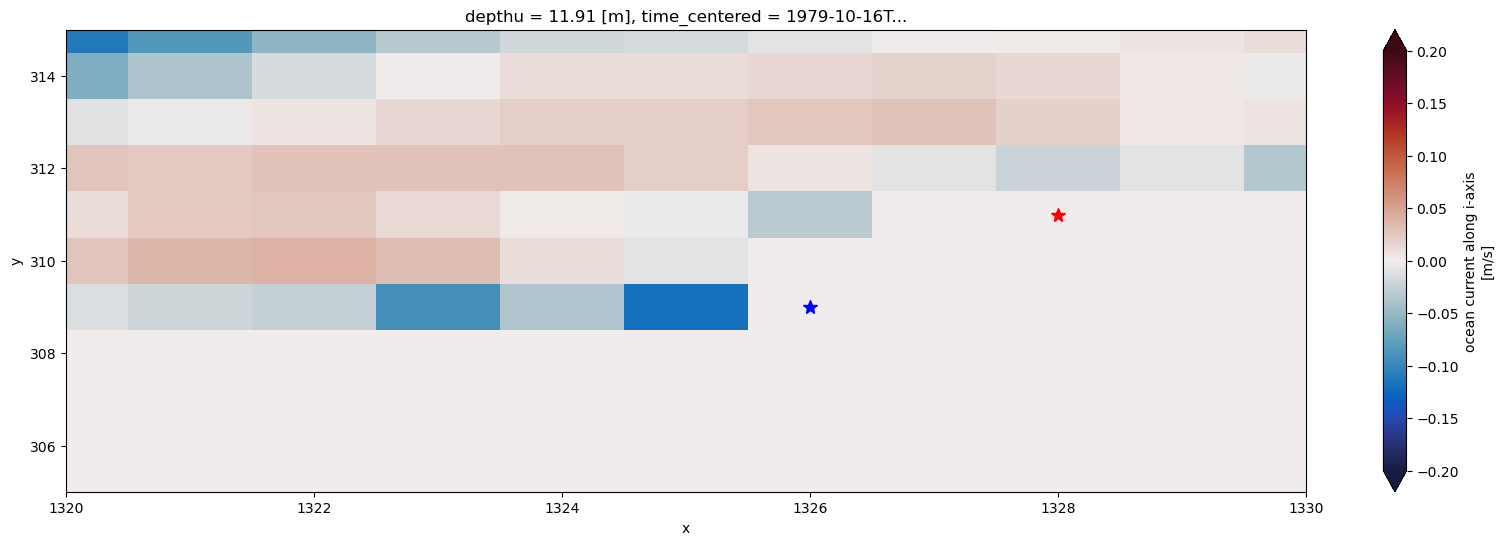

In [60]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsU.uo.isel(time_counter=9,depthu=8).plot(vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance, ax=ax, 
                                          xlim=(1320, 1330), ylim=(305, 315))
ax.plot([1328],[311], '*r', markersize=10);
ax.plot([1326],[309], '*b', markersize=10);

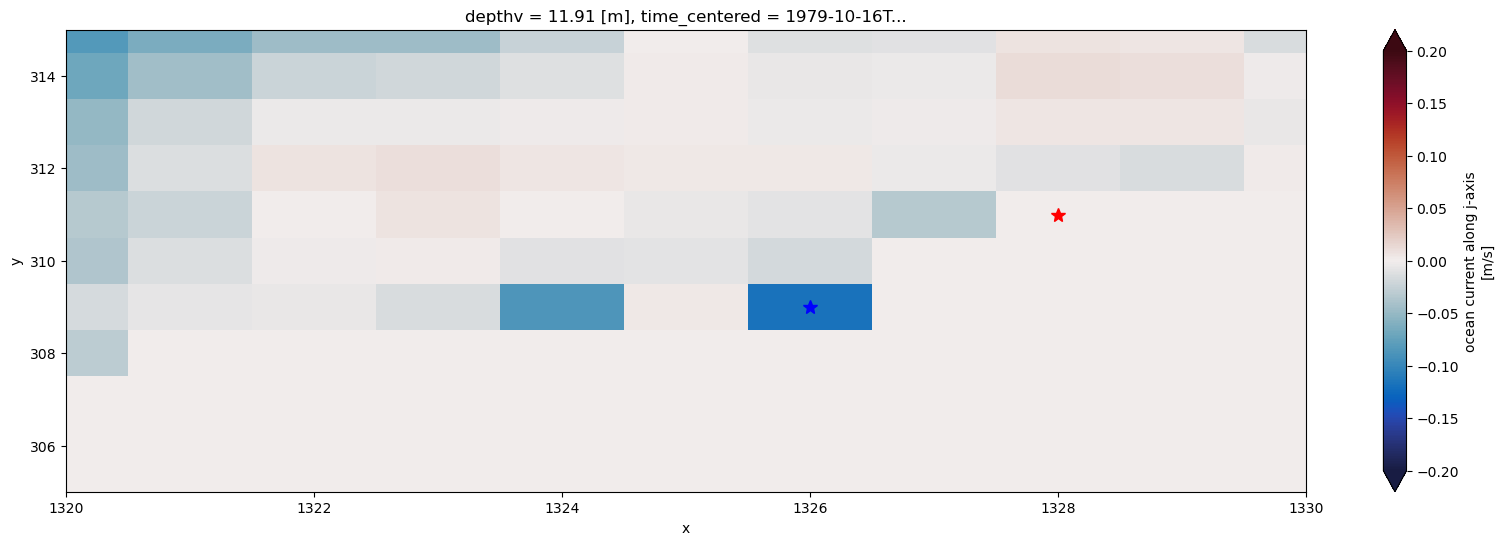

In [61]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsV.vo.isel(time_counter=9,depthv=8).plot(vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance, ax=ax, 
                                          xlim=(1320, 1330), ylim=(305, 315))
ax.plot([1328],[311], '*r', markersize=10);
ax.plot([1326],[309], '*b', markersize=10);

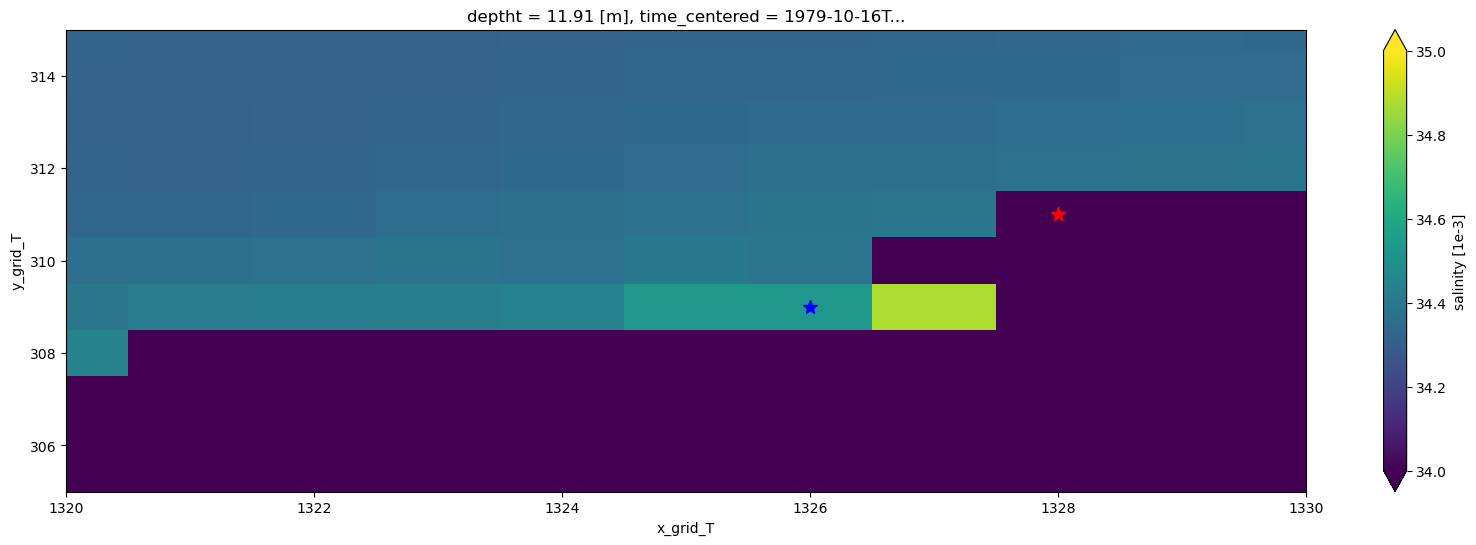

In [62]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsT.so.isel(time_counter=9,deptht=8).plot(vmin=34, vmax=35, ax=ax, xlim=(1320, 1330), ylim=(305, 315))
ax.plot([1328],[311], '*r', markersize=10);
ax.plot([1326],[309], '*b', markersize=10);

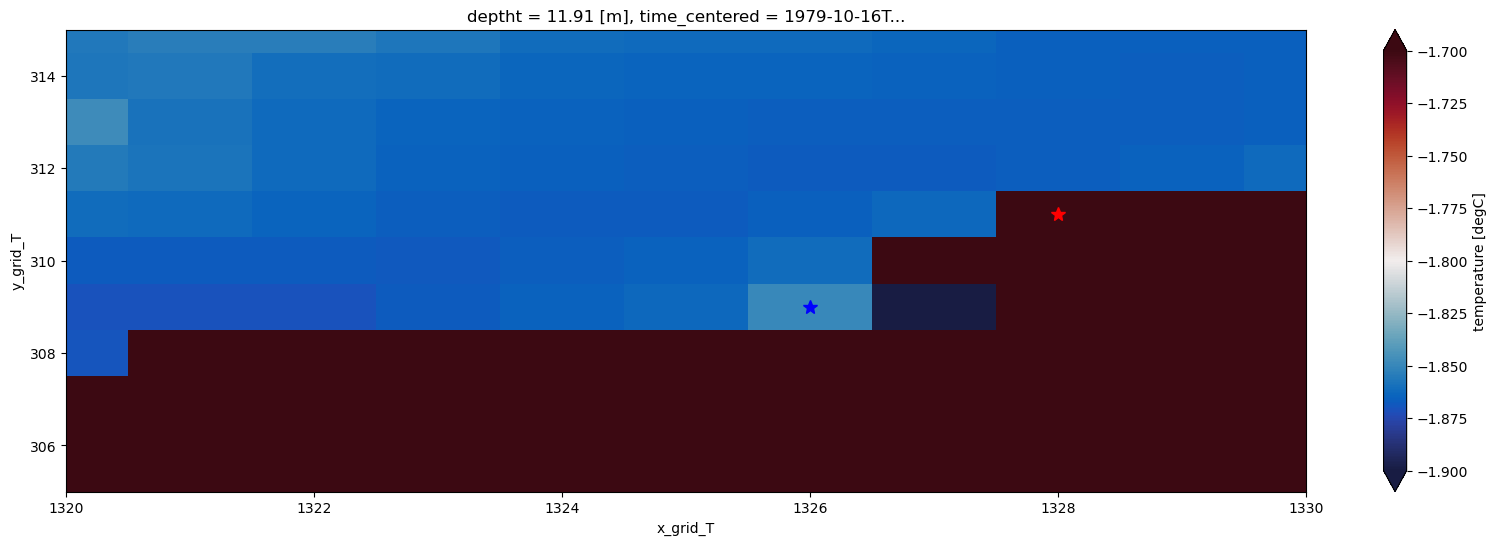

In [63]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsT.thetao.isel(time_counter=9,deptht=8).plot(vmin=-1.9, vmax=-1.7, cmap=cmocean.cm.balance, ax=ax, xlim=(1320, 1330), ylim=(305, 315))
ax.plot([1328],[311], '*r', markersize=10);
ax.plot([1326],[309], '*b', markersize=10);

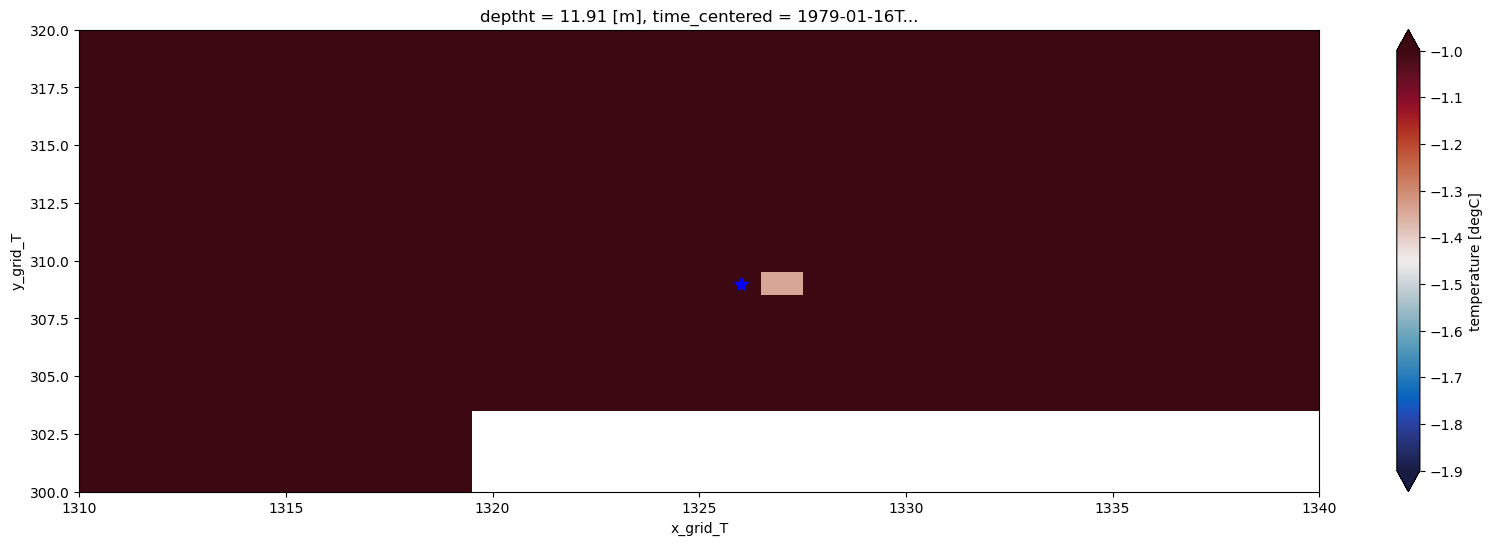

In [22]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsT.thetao.isel(time_counter=0,deptht=8).plot(vmin=-1.9, vmax=-1, cmap=cmocean.cm.balance, ax=ax, xlim=(1310, 1340), ylim=(300, 320))
ax.plot([1326],[309], '*b', markersize=10);

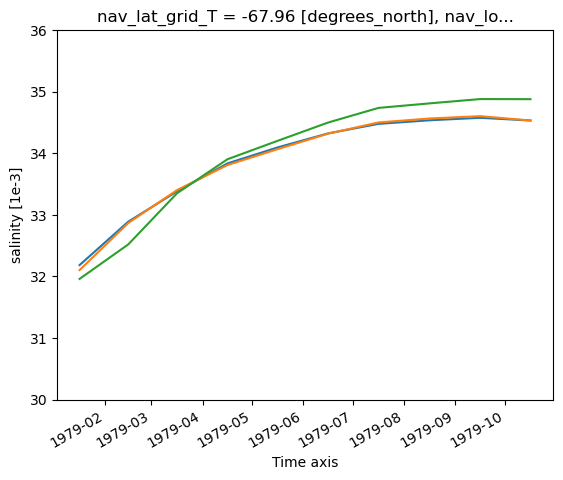

In [42]:
dsT.so.isel(deptht=8, x_grid_T=1325, y_grid_T=309).plot(ylim=(30, 36))
dsT.so.isel(deptht=8, x_grid_T=1326, y_grid_T=309).plot(ylim=(30, 36))
dsT.so.isel(deptht=8, x_grid_T=1327, y_grid_T=309).plot(ylim=(30, 36))

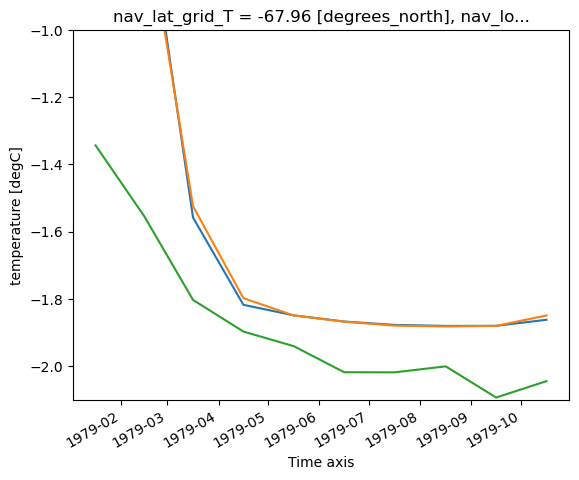

In [36]:
dsT.thetao.isel(deptht=8, x_grid_T=1325, y_grid_T=309).plot(ylim=(-2.1, -1))
dsT.thetao.isel(deptht=8, x_grid_T=1326, y_grid_T=309).plot(ylim=(-2.1, -1))
dsT.thetao.isel(deptht=8, x_grid_T=1327, y_grid_T=309).plot(ylim=(-2.1, -1))

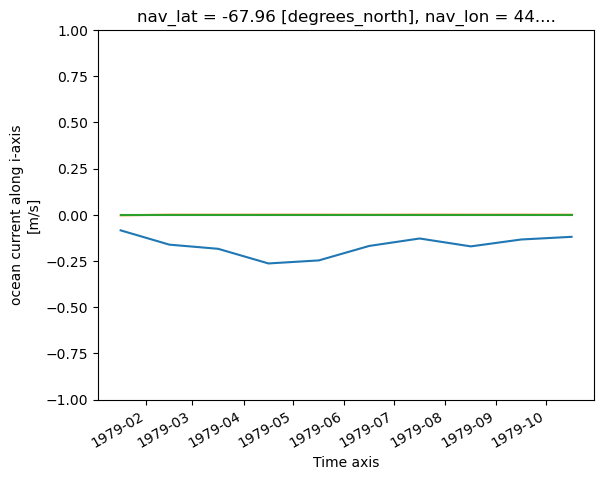

In [86]:
dsU.uo.isel(depthu=7, x=1325, y=309).plot(ylim=(-1, 1))
dsU.uo.isel(depthu=7, x=1326, y=309).plot(ylim=(-1, 1))
dsU.uo.isel(depthu=7, x=1327, y=309).plot(ylim=(-1, 1))

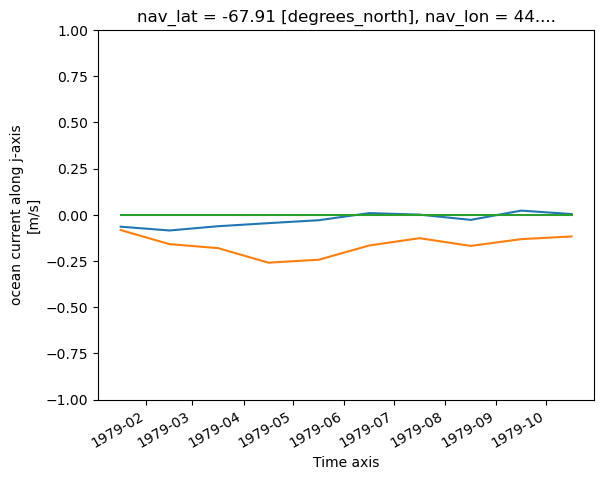

In [85]:
dsV.vo.isel(depthv=7, x=1325, y=309).plot(ylim=(-1, 1))
dsV.vo.isel(depthv=7, x=1326, y=309).plot(ylim=(-1, 1))
dsV.vo.isel(depthv=7, x=1327, y=309).plot(ylim=(-1, 1))

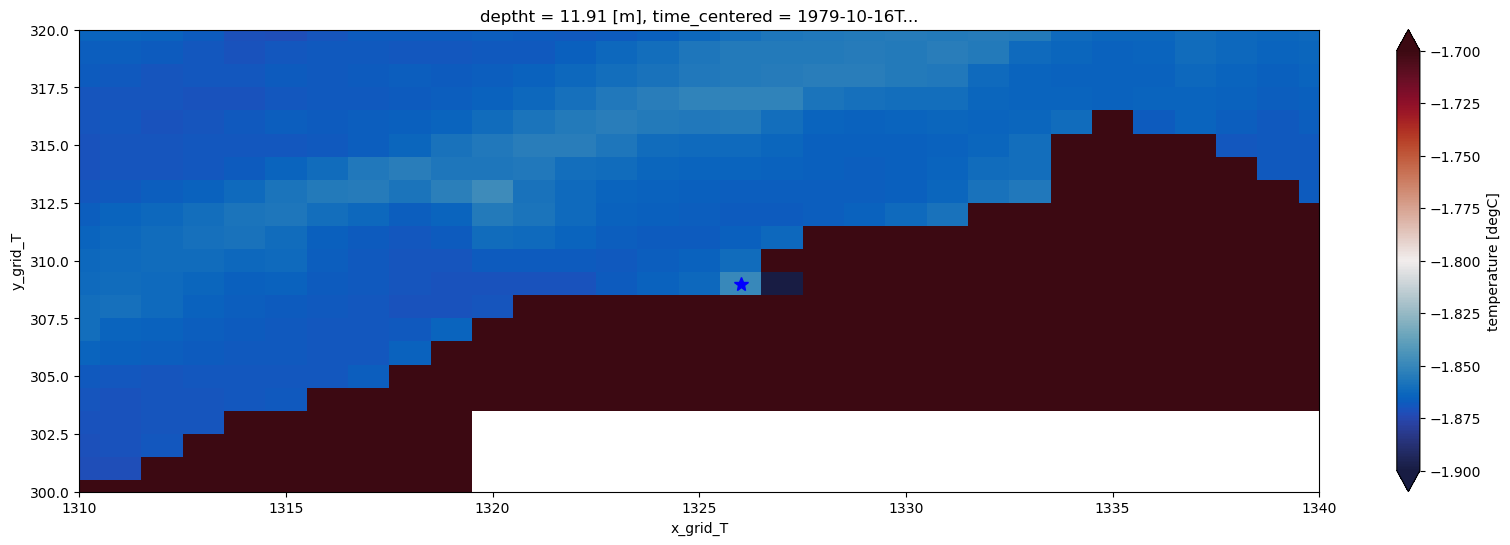

In [23]:
fig, ax = plt.subplots(1,1, figsize=(20,6))
dsT.thetao.isel(time_counter=9,deptht=8).plot(vmin=-1.9, vmax=-1.7, cmap=cmocean.cm.balance, ax=ax, xlim=(1310, 1340), ylim=(300, 320))
ax.plot([1326],[309], '*b', markersize=10);

New domain_cfg file etc. :

```
  ===>>> : E R R O R

          ===========

   stp_ctl: |ssh| > 20 m  or  |U| > 10 m/s  or  S <= 0  or  S >= 100  or  NaN encounter in the tests

 kt 22494 |ssh| max   14.52     at i j   1327 310     MPI rank 376
 kt 22494 |U|   max   215.6     at i j k 1327 310   9 MPI rank 376
 kt 22494 Sal   min   25.70     at i j k  670 231  40 MPI rank 184
 kt 22494 Sal   max   72.54     at i j k 1327 310   8 MPI rank 376
```

In [3]:
dso = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/eANT025.L121_BDY_1_tune_seaice/output.abort_0376.nc').isel(time_counter=0)
dsi = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/eANT025.L121_BDY_1_tune_seaice/output.abort_ice_0376.nc').isel(time_counter=0)

Variables:
- rfrac_cav_tbl --- fraction of bottom cell affected by tbl
- rhisf_cav_tbl --- thickness of top boundary layer ice shelf
- fwfisf_cav --- ice shelf freshwater flux (ice to ocean)
- misfkt_cav --- top level of the top boundary layer
- misfkb_cav --- bottom level of the top boundary layer
- sowaflup --- net upward water flux
- sohefldo --- net downward heat flux
- soshfldo --- shortwave radiation
- soicecov --- ice fraction
- sozotaux --- wind stress

```
            CALL iom_rstput( 0, 0, inum, 'fwfisf_cav', fwfisf_cav          )
            CALL iom_rstput( 0, 0, inum, 'rhisf_cav_tbl', rhisf_tbl_cav    )
            CALL iom_rstput( 0, 0, inum, 'rfrac_cav_tbl', rfrac_tbl_cav    )
            CALL iom_rstput( 0, 0, inum, 'misfkb_cav', REAL(misfkb_cav,wp) )
            CALL iom_rstput( 0, 0, inum, 'misfkt_cav', REAL(misfkt_cav,wp) )
            CALL iom_rstput( 0, 0, inum, 'mskisf_cav', REAL(mskisf_cav,wp), ktype = jp_i1 )
```

Point with the issue has a 2 cell ice shelf cavity and is quite shallow. Bottom cell is not affected by tbl. Thickness of top boundary layer is zero. So, it doesn't have a top boundary layer?

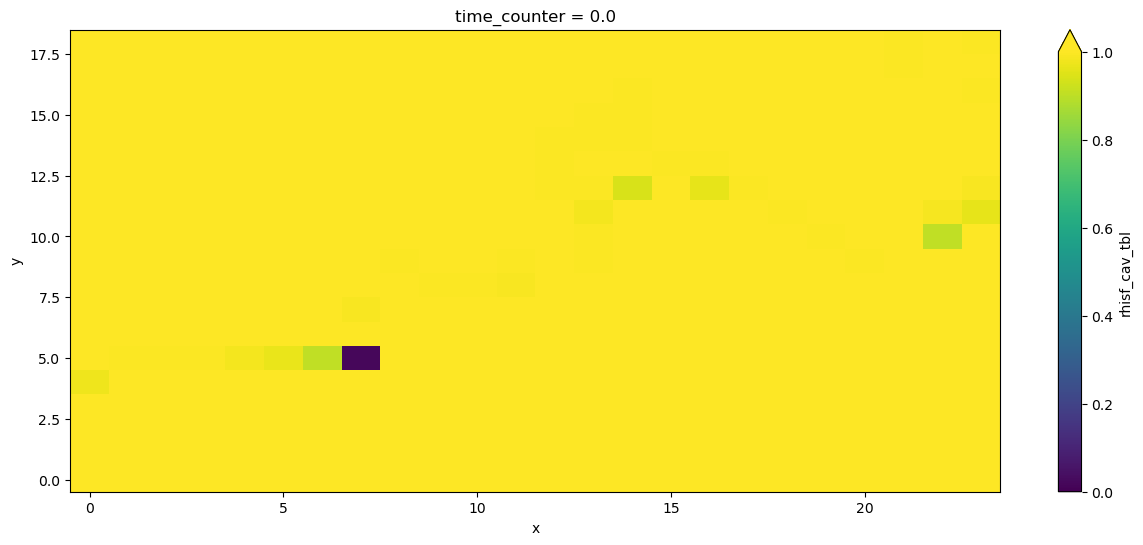

In [49]:
dso.rhisf_cav_tbl.plot(figsize=(15,6), vmin=0, vmax=1)

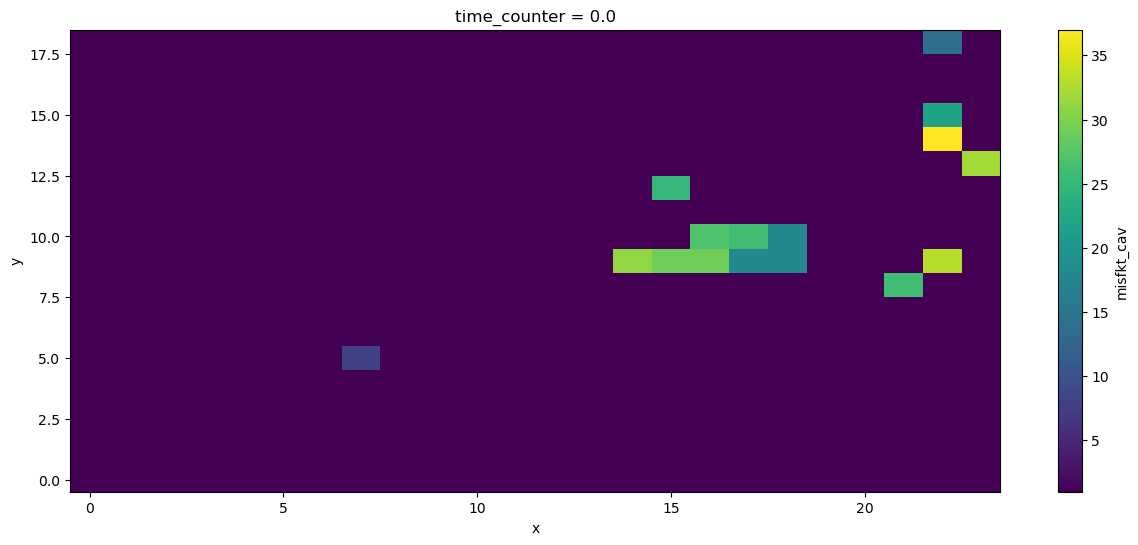

In [7]:
dso.misfkt_cav.plot(figsize=(15,6))

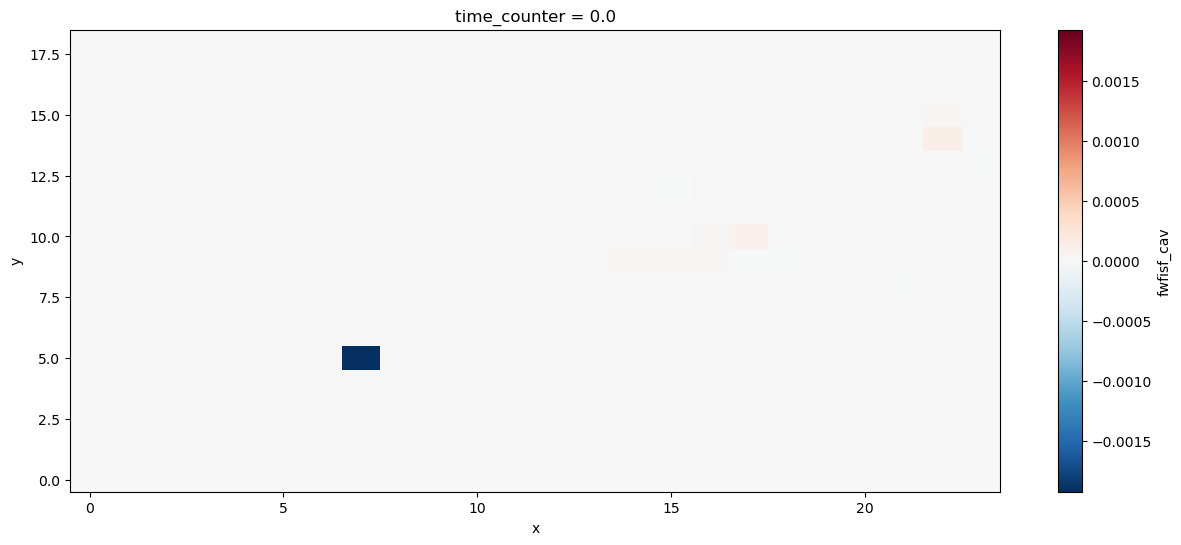

In [18]:
dso.fwfisf_cav.plot(figsize=(15,6))

---> could the issue be because of the land drowning in the underlying JRA files? Or maybe this is just because of where iceshelves are

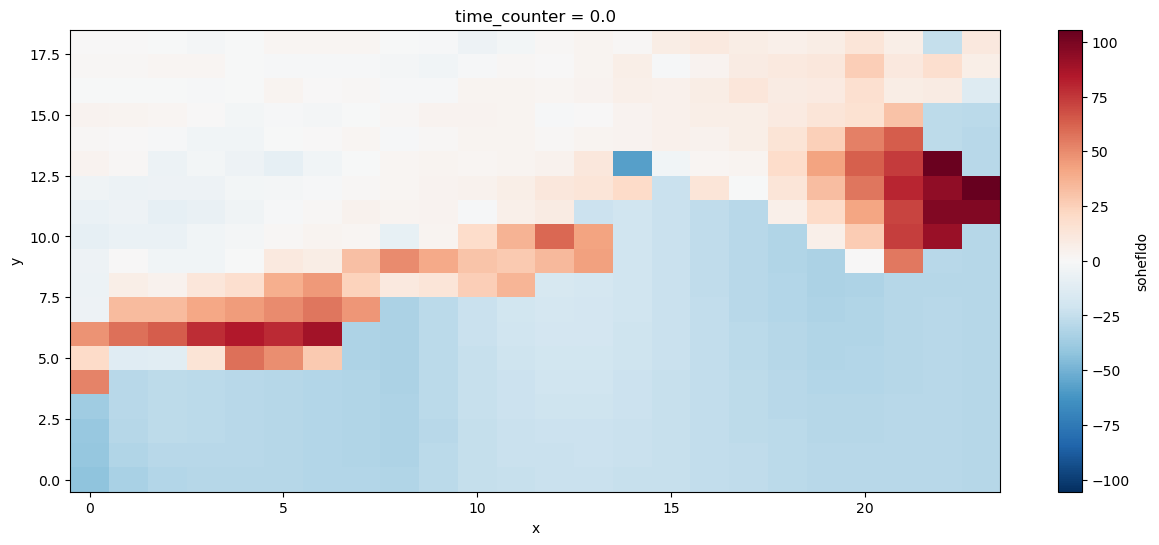

In [87]:
dso.sohefldo.plot(figsize=(15,6))

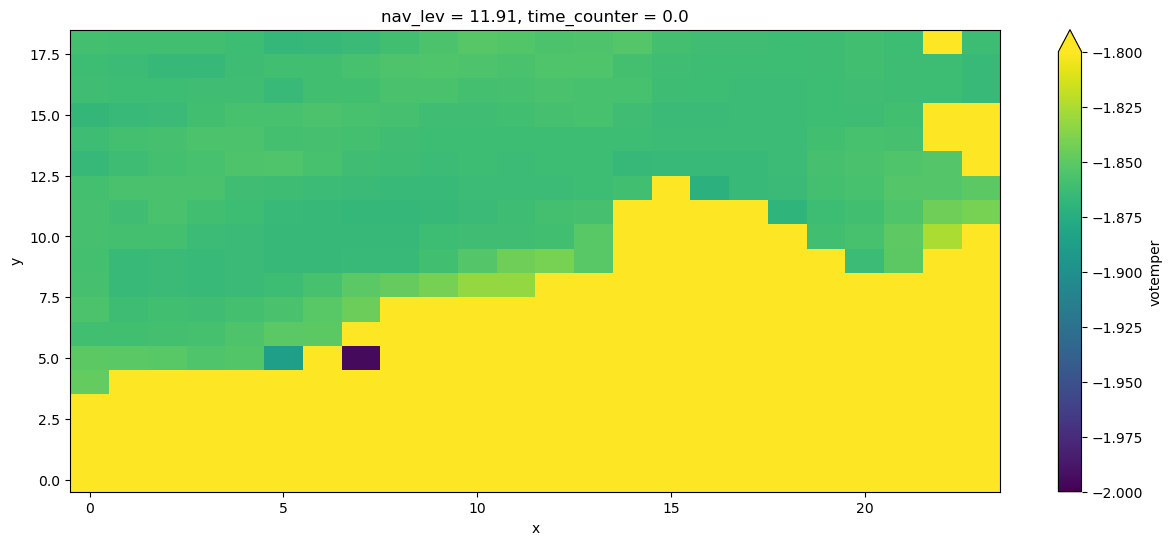

In [15]:
dso.votemper.isel(nav_lev=8).plot(vmin=-2, vmax=-1.8, figsize=(15,6))

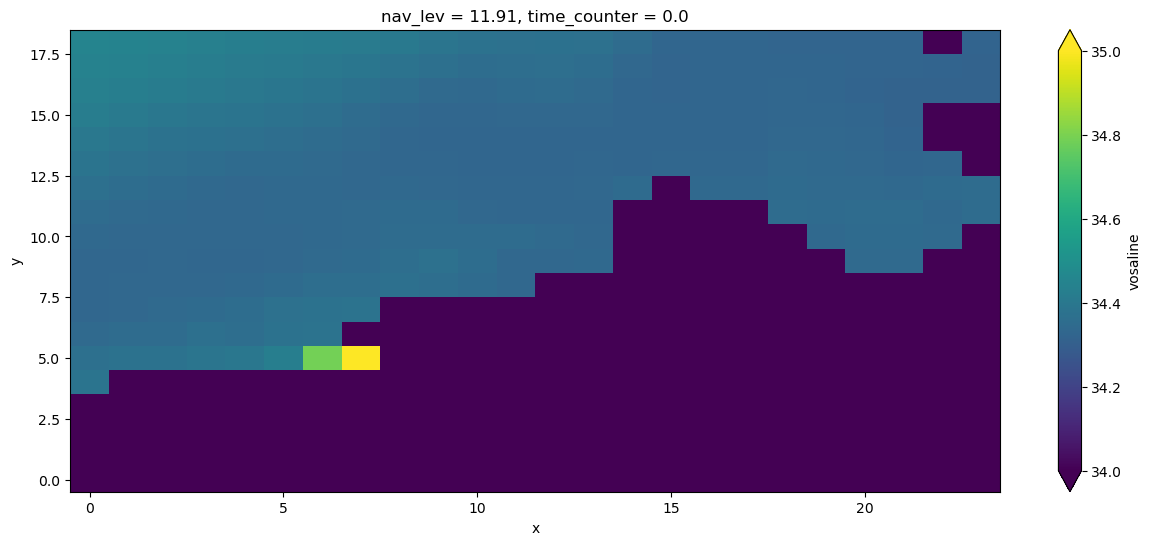

In [58]:
dso.vosaline.isel(nav_lev=8).plot(vmin=34, vmax=35, figsize=(15,6))

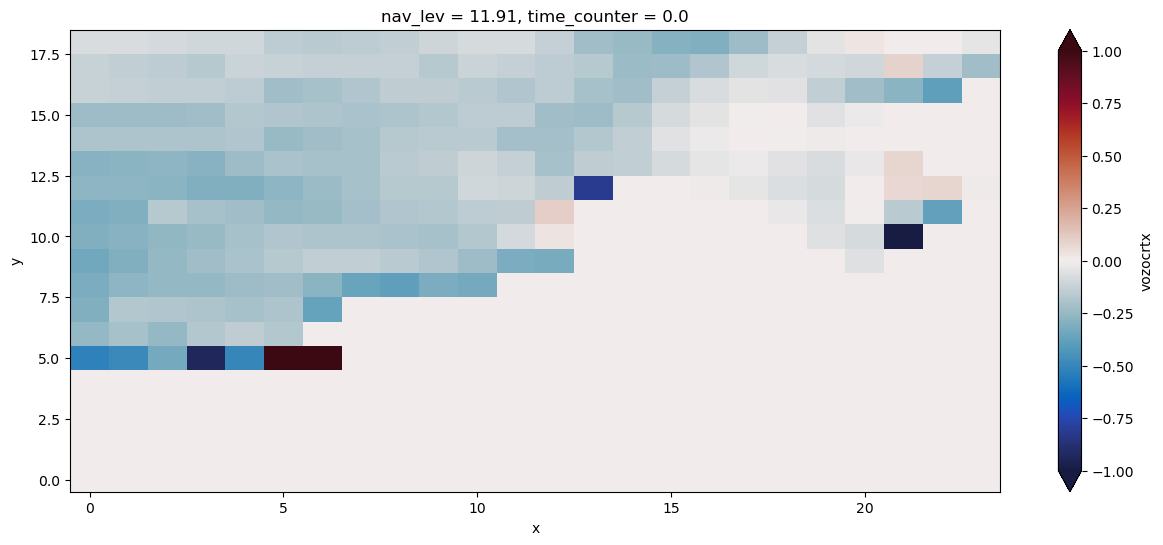

In [65]:
dso.vozocrtx.isel(nav_lev=8).plot(vmin=-1, vmax=1, figsize=(15,6), cmap=cmocean.cm.balance)

In [73]:
dso.vomecrty

<xarray.DataArray 'vomecrty' (nav_lev: 121, y: 19, x: 24)>
[55176 values with dtype=float64]
Coordinates:
  * nav_lev       (nav_lev) float32 0.4921 1.526 2.638 ... 5.698e+03 5.902e+03
    time_counter  float32 0.0
Dimensions without coordinates: y, x

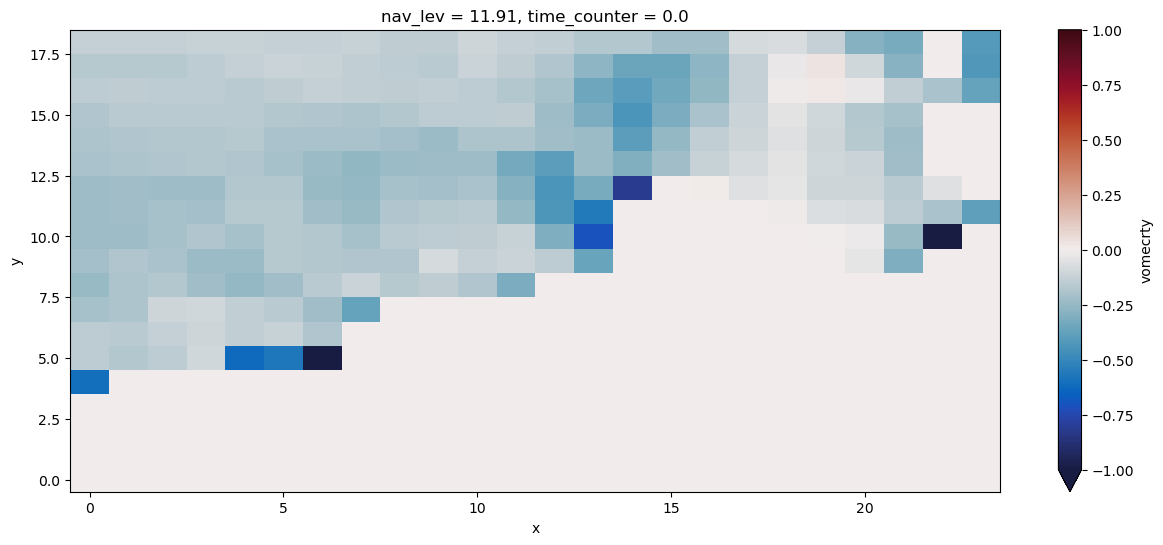

In [66]:
dso.vomecrty.isel(nav_lev=8).plot(vmin=-1, vmax=1, figsize=(15,6), cmap=cmocean.cm.balance)

### Also look at end of 10 year run that crashes at same location 

```
   stp_ctl: |ssh| > 20 m  or  |U| > 10 m/s  or  S <= 0  or  S >= 100  or  NaN encounter in the tests

 kt 259655 |ssh| max   17.81     at i j   1328 310     MPI rank 376
 kt 259655 |U|   max   362.2     at i j k 1327 310   8 MPI rank 376
 kt 259655 Sal   min  0.1000     at i j k 1327 310   1 MPI rank 376
 kt 259655 Sal   max   35.66     at i j k  357 281  18 MPI rank 239
```

In [4]:
dso = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/BDY_1/output.abort_0376.nc').isel(time_counter=0)
dsi = xr.open_dataset('/gws/nopw/j04/terrafirma/birgal/NEMO_AIS/output/new-setup-testing/BDY_1/output.abort_ice_0376.nc').isel(time_counter=0)

Variables:
- rfrac_cav_tbl --- fraction of bottom cell affected by tbl
- rhisf_cav_tbl --- thickness of top boundary layer ice shelf
- fwfisf_cav --- ice shelf freshwater flux (ice to ocean)
- misfkt_cav --- top level of the top boundary layer
- misfkb_cav --- bottom level of the top boundary layer
- sowaflup --- net upward water flux
- sohefldo --- net downward heat flux
- soshfldo --- shortwave radiation
- soicecov --- ice fraction
- sozotaux --- wind stress

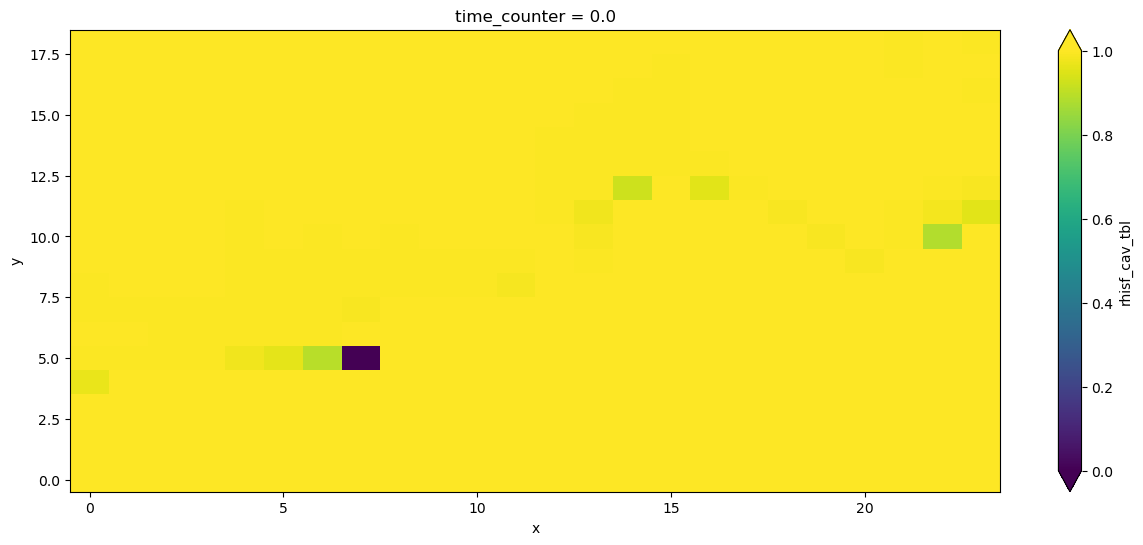

In [5]:
dso.rhisf_cav_tbl.plot(figsize=(15,6), vmin=0, vmax=1)

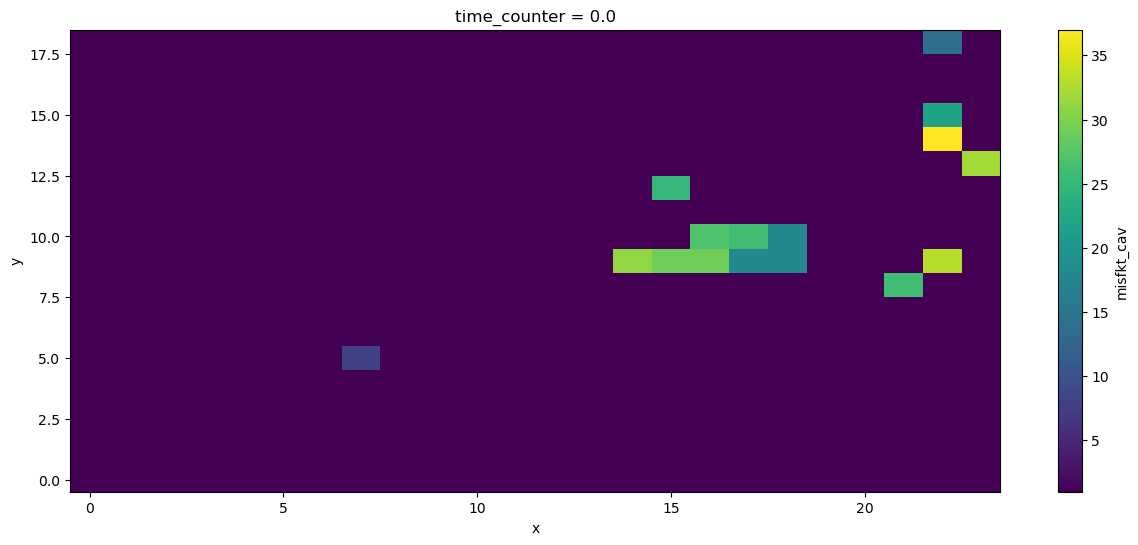

In [13]:
dso.misfkt_cav.plot(figsize=(15,6))

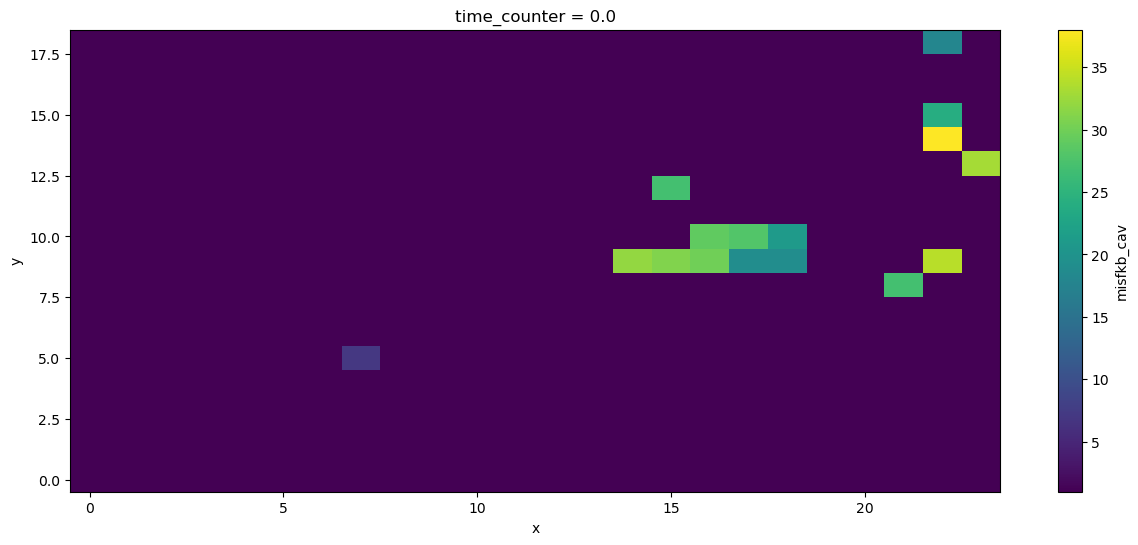

In [14]:
dso.misfkb_cav.plot(figsize=(15,6))

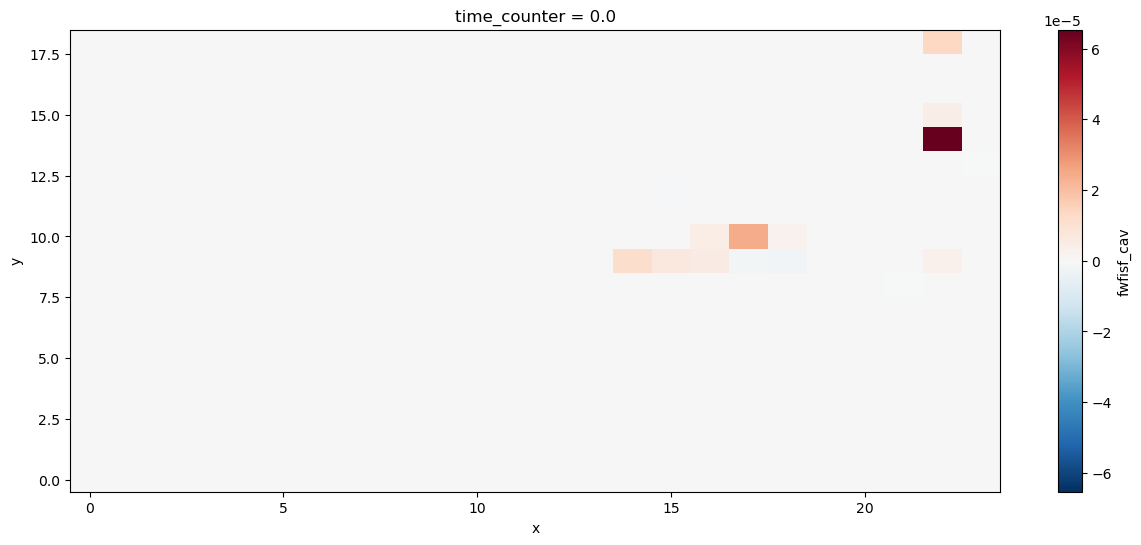

In [7]:
dso.fwfisf_cav.plot(figsize=(15,6))

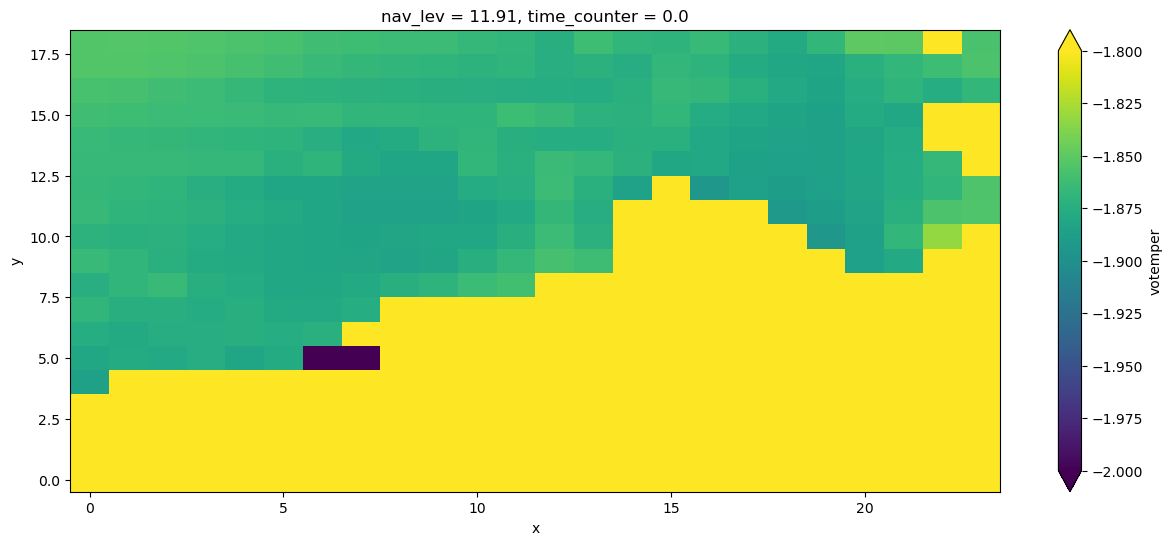

In [9]:
dso.votemper.isel(nav_lev=8).plot(vmin=-2, vmax=-1.8, figsize=(15,6))

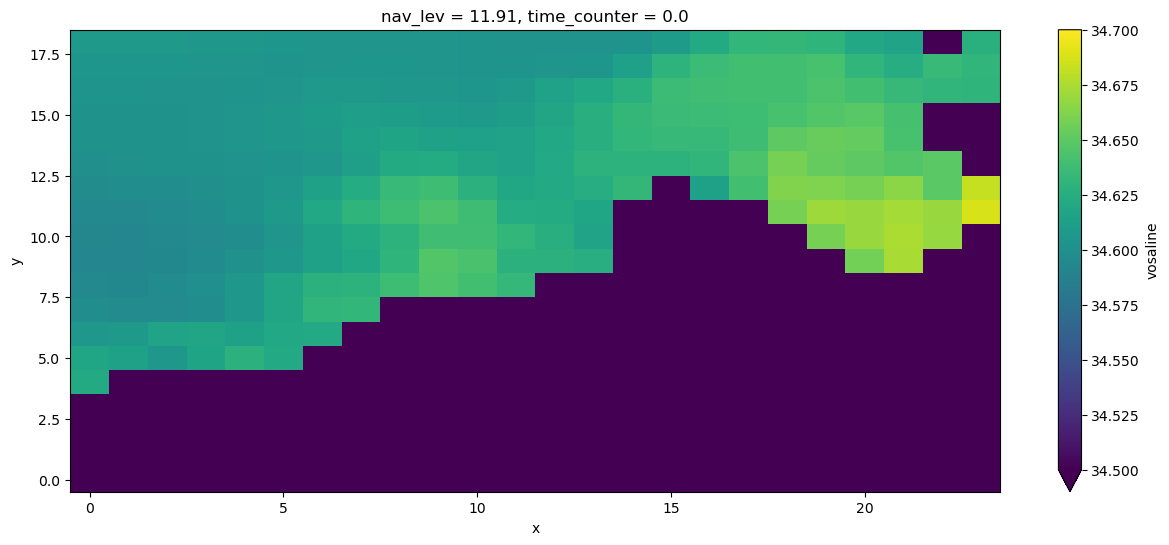

In [19]:
dso.vosaline.isel(nav_lev=8).plot(vmin=34.5, vmax=34.7, figsize=(15,6))